### Autor: Andres Felipe Villalba Cortes
> Soy estudiante de Física de la Universidad Nacional con 20 años de edad. Mi amor por la física comenzó en 2019 cuando participé en las olimpiadas colombianas de física obteniendo como resultado ser finalista y posteriormente poder ser segundo equipo ( la reserva :( ) para representar a Colombia en las IPHO en Lituania.
Despues de una mala racha en mi vida personal por los ultimos años, recientemente estoy en búsqueda de un desarrollo personal similar al que tuve en mi pasado




# **Clusterización**
<img src="https://pbs.twimg.com/media/EiAuAS8VoAA1-4T?format=jpg&name=large" alt="JuveR" width="300px">

## **¿Qué es y para qué sirve?**

La clusterización es un proceso no supervisado de machine learning que consiste en separar o categorizar un dataset en un número de grupos, basado en la similaridad de los datos, agrupando aquellos con carácterísticas similares en un mismo cluster y aquellos con características diferentes en otros.

Existen muchos algoritmos allá afuera, algunos de ellos son:


*   K-means
*   DBSCAN
*   Ward hierarchical clustering
*   Gaussian Mixture Model
*   Agglomerative Clustering
*   BIRCH

Para más información es recomendable visitar la pagina de la documentación de la libreria de python [Scikit-learn](https://scikit-learn.org/stable/modules/clustering.html): 

Explicaré a cntinuación el método K-means a detalle





# **K-means**

El algoritmo de k-means se llama así porque agrupa los datos en un número *K* de grupos, donde *K* es establecido por el usuario. El algoritmo intenta minimizar la suma de los cuadrados dentro de cada cluster y define un punto central llamado **centroide**. El metodo de k-means incluye a todos los datos disponibles en clusters.

Este algoritmo se puede usar en diferentes situaciones:

*   Segmentación de imagen
*   Análisis de redes sociales
*   Clasificación de documentos
*   Detección de anomalías

Y dentro de las geociencias se puede usar para:

*   Clasificación de facies de pozos y/o de nucleos de perforación
*   Detección de valores atípicos en pozos

### **¿Cómo funciona?**

**Paso 1**: Identificar el número de clusters en los que queremos separar nuestros datos.

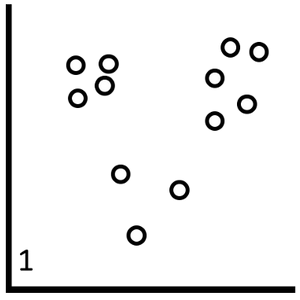

**Paso 2**: Seleccionar k puntos aleatorios del dataset.

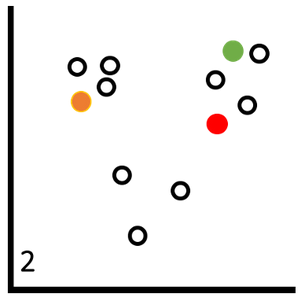

**Paso 3**: Calcular la distancia Euclidea entre puntos y centroides. Luego asignar puntos al centroide más cercano.

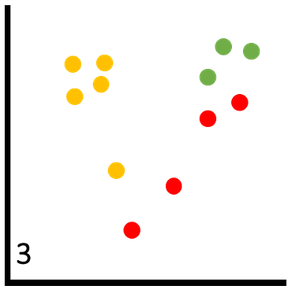

*Distancia Euclidea:*
\begin{align}
f(x)= \sqrt{(x_{2} -  x_{1})^2+(y_{2}-y_{1})^2}
\end{align}



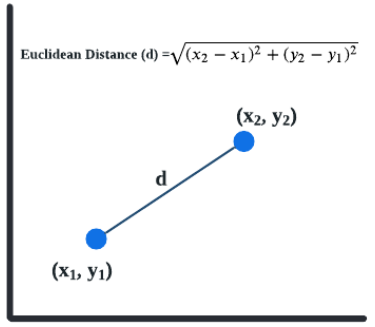

**Paso 4**: Identificar los nuevos centroides con los puntos medios entre cada cluster.

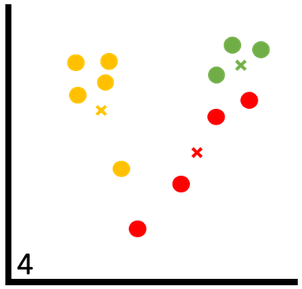

**Paso 5**: Asignar nuevamente los puntos a los nuevos centroides.

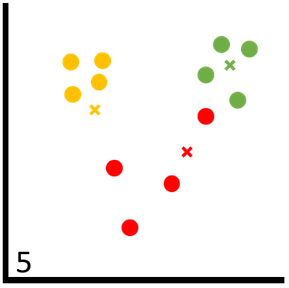

**Paso 6**: Volver a calcular los puntos medios de cada cluster y volver a ajustar los centroides.

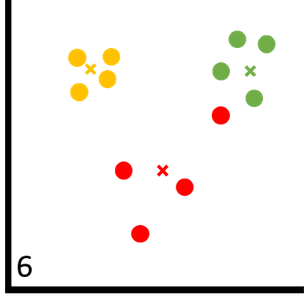

**Paso 7**: Repetir nuevamente del paso 4 al 6 hasta que el número de iteraciones haya sido alcanzado o el modelo de convergencia no haya cambiado o los puntos han sido clusterizados.

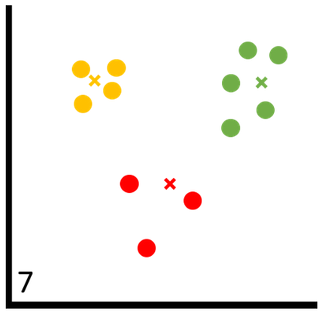

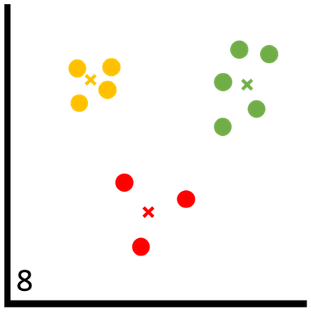

### **Ejemplo:**

Tenemos el siguiente dataframe:
 
 

In [ ]:
import math
import numpy as np
import pandas as pd

np.random.seed(123)

def circulo(num_datos = 100,R = 1, minimo = 0,maximo= 1, center_x = 0 , center_y = 0):
    pi = math.pi
    r = R * np.sqrt(np.random.uniform(minimo, maximo, size = num_datos)) 
    theta = np.random.uniform(minimo, maximo, size= num_datos) * 2 * pi

    x = center_x + np.cos(theta) * r
    y = center_y + np.sin(theta) * r

    x = np.round(x,3)
    y = np.round(y,3)

    df = np.column_stack([x,y])
    df = pd.DataFrame(df)
    df.columns = ['x','y']
    return(df)

# Crea los datos
datos_1 = circulo(num_datos = 20,R = 10, center_x = 5, center_y = 30)
datos_2 = circulo(num_datos = 20,R = 10, center_x = 20, center_y = 10)
datos_3 = circulo(num_datos = 20,R = 10, center_x = 50, center_y = 50)

df = datos_1.append(datos_2).append(datos_3)
df.head()

,x,y
0,-0.542,23.761
1,8.129,25.661
2,4.239,25.298
3,-0.691,25.230
4,3.539,21.645


[[47.6788     46.1508    ]
 [ 4.44325    25.237125  ]
 [17.85892308  4.81292308]
 [ 1.54925    34.20066667]
 [45.4994     56.989     ]
 [23.67371429 15.19414286]
 [54.7382     52.8136    ]]


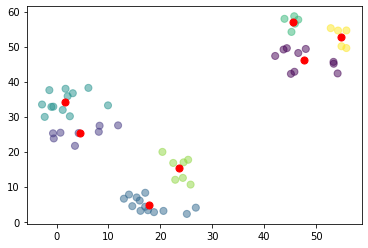

In [ ]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
  
kmeans = KMeans(n_clusters=7).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

<h3 style="color:grey;">Referencias</h3>

1. [Clusterisación](https://www.zendesk.com.mx/blog/significado-cluster/#:~:text=El%20significado%20de%20cluster%20es%20bastante%20simple%20y%20práctico%3A%20agrupar,características%20que%20tienen%20en%20común.)


  Link directo a colab ---> [Colaboratory](https://colab.research.google.com/drive/1DnU0J53INVRYYn9SYtba_YwlFAz_6yhf?usp=sharing)
  

